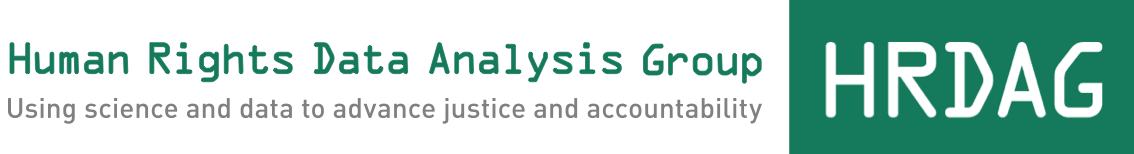

In [1]:
from IPython.display import Image
Image(filename='imgs/banner.png')

In [2]:
%load_ext pretty_jupyter

/Users/home/opt/miniconda3/envs/toolkit/lib/python3.13/site-packages/pretty_jupyter/constants.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [3]:
%%html

<style>
    #Styling {
        font-weight: bold;
        font-family: Helvetica;
    }
</style>

# Chapter One: What is a 'Missing Person' event?

### _Before you read_ <a class="anchor" id="tw"></a>

The Chicago Missing Persons data series seeks to represent the technical work and findings of the investigation by Invisible Institute ("II"), City Bureau ("CB"), and the Human Rights Data Analysis Group ("HRDAG").

One of HRDAG's goals as an organization is to explain why data collection methods and possible analyses are necessarily and deeply intertwined, and make it known when certain statements are not possible or reasonable to make with a given dataset. Relatedly, an important part of this story involves reviewing a few of the widely-publicized cases from the time period and comparing the ground truth as reported by the community and media to what is prescribed by policy and presented in the city’s data, which realizes certain shortcomings highlighted by the HRDAG team. Grounding the technical work with examples like these is key to our ability to place the data firmly in the real-world context in which it lives and to depict the significance of the findings through the lens of lived experience.

Discussions of these cases may include the names of missing and murdered humans, details from CPD's investigations, and reports from the County Medical Examiner’s office including manner and method of death. While we do not wish to sensationalize or center any gruesome detail, we recommend discretion in reading this notebook as the information discussed in it may be upsetting or triggering. The heaviest section will be the final one on Record Linkage.

If you're interested in any of the code snippets used throughout this chapter, you can unfold them by clicking the `CODE` box on the right hand side of the page.

# About the project <a class="anchor" id="about"></a>

Through Beneath the Surface, an initial public records request for missing persons report data was sent to **Chicago Police Department (CPD)**. As the investigation continued for two more years, additional requests were made for the updated dataset from **CPD**, as well as new requests for 911 call data related to missing persons reports from the **Office of Emergency Management and Communications (OEMC)** and death data from the **Cook County Medical Examiner (ME)**.

We hoped to use the CPD data to reproduce its previous public claims that suggested 99.9% of missing persons reports were for runaways who had been located, as well as compare the ground truth events and data narrative of several widely-reported missing persons cases.

Read the full, award-winning story [here](https://chicagomissingpersons.com/).

### Missing Persons <a class="anchor" id="about"></a>

According to the Illinois Intergovernmental Missing Child Recovery Act of 1984, the primary contact agency (in the case of Chicago, the Chicago Police Department) is to enter every missing persons report into the Law Enforcement Agencies Data System (LEADS) for the purpose of effecting an immediate law enforcement response to reports of missing children, as well as to compile and retain information regarding missing children and the circumstances that led to their missingness and recovery. This historic data repository was written into law so that it could provide a factual and statistical base for research which would enable a deeper understanding and addressing of the problem of missing children in Illinois. Also in support of this research goal, law enforcement are required to update cases to reflect and include information relating to the final disposition of each case, but Chicago police do not enforce this practice in a way that is transparent or reproducible by experts at HRDAG.

Regardless of a legislative body's intentions in tasking an agency with data collection, many of the agency's own internal objectives can shape what that data collection looks like in practice, and thus the limitations of the dataset on statistical analyses. When it comes to the status field and tracking the "Closed Non-Criminal" label, there could be many organizational interests at play:
- Middle management may want to use it as a flag to track active work assignments in order to manage workloads.
- Management (or oversight agencies) might want to be able to identify poor performing staff before they become a larger liability.
- Police unions might push back against additional tracking for the same reason as any labor organization would want to protect its members from additional employer surveillance, which in this case means avoiding the kind of accountability implied in the previous point.
- Some of the agency leadership along with the political interests who appoint them have an interest in being able to influence or manipulate public opinion towards more trust and reliance on police.

### Exploratory analysis found discrepancies in the data <a class="anchor" id="discrepancies"></a>

Our team almost immediately identified two cases which were classified as closed non-criminal even though a murder investigation was opened for the missing individual. After two years and reviewing all available case records for several dozen widely-reported on missing persons from 2000-2022, we were able to identify a total of 11 cases which were classified as "Closed Non-criminal" even though a homicide case had been opened for the missing, including 1 where the CPD Homicide case is explicitly mentioned in the request to reclassify the missing person report as non-criminal. We were also able to identify 4 cases in which the Chicago Police closed the missing persons case before the person was found – including two cases where the Black teenage girl was subsequently found murdered.

We’re not the only group to review CPD's record-keeping and encounter problems. In the past, CPD was investigated by the DOJ for several things. In a section of the [2017 DOJ report](https://www.justice.gov/d9/chicago_police_department_findings.pdf) from the investigation, titled, “CPD Does Not Provide Officers With Sufficient Direction, Supervision, or Support to Ensure Lawful and Effective Policing”, the data collection and public transparency methods were deemed "insufficient" by the DOJ. The section further revealed information about the poor usability and interoperability of **CPD's** software systems that contributed to our understanding of the internal data generation process in place for the first two-thirds of the record-keeping period. During our investigation, II also received information that CPD personnel influenced the design of some of their data entry system to discourage the use of structured fields and things like drop-down menus, at a cost to the ease of both data entry and producing summary statistics from the data. This design choice explained how some of the data entry errors we found, like the more than two dozen age values between 133 and 985 years old, or the year of birth recorded as "1776", were possible.

In our attempt to reproduce CPD's prior statistic that 99.9% of those reported missing were located, we were unable to identify any structured field maintaining this information. After following up with the responding FOIA officer, we were told to use the field that indicates the status of the investigation as Open or Closed and Criminal or Non-criminal. However, as we have already stated and will discuss further with examples in the Record Linkage section, the labels in the status field (particularly "Closed Non-criminal") can be a misleading characterization of the ground truth and have been applied to cases where the missing person faced a gruesome outcome rather than a safe return home. We hope this notebook will demonstrate the flaw in using the status field to fill in information about the outcomes of missing persons.

In this notebook we will introduce the datasets, our initial goals and questions, and the discrepancies we found between the data and ground truth outcomes. The next chapter will be on the events surrounding a missing persons event, including 911 calls, officer arrival, case closure, the UCR code, and a sneak peak of analysis involving missing person 911 calls and ShotSpotter dispatches. The next two will be on who is represented in the data and described in most reports, and then who is not represented in the data and the real-world circumstances that lead to someone being fully excluded from this kind of data collection.

### Questions we want to answer <a class="anchor" id="questions"></a>

Given a true collection of the unique IDs of everyone who went missing in the city of Chicago between 1 January 2000 and 31 December 2022 and information about the timeline and outcome for each individual, we would be able to respond precisely to questions like,

- how many humans went missing in Chicago in this time period?
- how many humans went missing in Chicago _more than once_ in this time period?
- how many humans who went missing in Chicago in this time period _were located in good health_?
- how many humans who went missing in Chicago in this time period _were located and had been the victim of a crime_?
- does the speed of officer arrival differ for humans _who have been missing before_ compared to _those who have not_?

However, the CPD dataset only includes an `rd` field which is unique to an incident report. It does not include a unique identifier field for individual humans, so we can't distinguish between multiple reports about the same person or calculate the precise number of individuals reported missing.

If we had **OEMC** and **ME** records that included external agency IDs like CPD's `rd` number, we could trace reports of missing humans from initial police report to the moment an officer arrived on scene, and follow reports that ended in the missing person being found deceased. However, these data were also not found in the responsive records.

We can explore instead the data generation process and link a small sample of identified records to underlying CPD reports, other agency data, and family and media statements in order to analyze the quality of the existing documentation.

---

# Introduce the data <a class="anchor" id="data-intro"></a>

### CPD Missing Persons (MP) <a class="anchor" id="cpd-mp"></a>
The Missing Persons data we received from CPD, combined into one table as `cpd_mp`, represents several database snapshots resulting from FOIA requests made over the course of the 2-year investigation. These FOIA requests asked for a copy of the database of missing persons reports and/or incidents originating as UCR code "6050". The `cpd_mp` dataset is used throughout much of the data series and to support some fact-checking for the [Chicago Missing Persons story](https://chicagomissingpersons.com).

- Source: Chicago Police Department
- CPD's digitized MP report database from 1 January 2000 to 31 December 2022
- 6 FOIA-requested versions between December 2020 and April 2023 (.xlsx)
- an additional extract from CPD’s report database, consisting of reports that originated as MP and were reclassified to another type of event (.xlsx)
- a couple dozen FOIA-requested original and supplementary incident reports (.pdf)

To start a discussion of the data series behind missing persons reports, it behooves us to define 1) our 'unit of analysis', the basic unit of the thing we're interested in studying. At HRDAG, we typically design a dataset around the question, "Who did what to whom?", with information like the name of the injured or killed person and the location of the incident.

These are the core features of the missing persons data as collected/recorded by CPD:
- `rd` or Records Division number
- date last seen (AKA `date_occurred`)
- location last seen (AKA `address`)
- some info about the missing person (this will be covered as its own topic)

So, in this context, our data is more appropriately structured around, "Who was last seen where?" We think of this as the event of a person going missing. Each row in the data represents 1 unique `rd` number and person reported missing.

---

### CPD Homicide <a class="anchor" id="cpd-hom"></a>
We also received Homicide data from CPD, `cpd_hom`, which is a database snapshot shared by CPD as a result of a FOIA request for a copy of the database of incidents originally and/or currently classified as a Homicide. This dataset is used in this first data story notebook to verify some of the Record Linkage pieces that center missing and murdered humans whose cases were widely publicized. There, we display and discuss what the missing persons, homicide, and medical examiner's data say about what happened in conjunction with what was public knowledge at the time and pursued in criminal court.

- Source: Chicago Police Department
- CPD's digitized Homicide report database from 1 January 2000 to 1 January 2023
- 1 FOIA-requested version (.xlsx)

The CPD Homicide data contains the unredacted full name, sex, and age of the deceased, along with status and timeline information about the case. Each row represents 1 unique `rd` number and person reported as the victim of a homicide.

---

### Office of Emergency Management & Communication (OEMC) <a class="anchor" id="oemc"></a>
In the course of the investigation, we requested and obtained a copy of OEMC's 911 dispatch data, `oemc`. This data is used in the second notebook to explore how missing persons reports, or those with `init_type` of "MISSING PERSON" or "MISSING PER. TENDER AGE", that originate from a 911 call are prioritized and dispatched.

- Source: Office of Emergency Management & Communication
- 1 FOIA-requested sample of 2 files, covering April 2018 to April 2022
- 1 file of all dispatches, including initial event type, `init_type`, and priority, `init_priority`
- 1 file of locations, only for `init_type` of "MISSING PERSON"

The OEMC call data contains the timeline, event type, and priority of each request for dispatch. Each row represents 1 unique `eventnumber` and a 911 call or other emergency dispatch (ShotSpotter "calls" are not true 911 calls but go through OEMC the same way for dispatch purposes).

---

### Cook County Medical Examiner (ME) <a class="anchor" id="ccme"></a>
In the course of the investigation, we requested a copy of the County Medical Examiner's database for cases where the manner of death was determined to be homicide (`me`). We reference `me` in the Record Linkage section of this first data story notebook where we look up the city's data on a few specific cases that made headlines.
- Source: Cook County Medical Examiner
- 1 FOIA-requested version covered 1 January 2000 - 1 August 2014
- 2 FOIA-requested versions covering the partial timeline or with partial case details

The ME death data contains the timeline, manner of death, and personally identifying information of each person found deceased in the county. Each row represents 1 unique `casenumber` and person found deceased.

---

Many other sources and supplementary documents were included in the investigation, including policy and directive orders, and dozens of interviews with the family and friends of missing humans, staff at congregate care facilities, former and current CPD personnel, and experts who study missing and murdered humans. Where possible, other public resources like the [Cook County Sheriff's Office](https://www.cookcountysheriffil.gov/person/), [Illinois Missing](https://illinoismissing.org/missing/), and [NamUs](https://namus.nij.ojp.gov/) were referenced. With the **OEMC** and **ME** datasets, we hoped to perform record linkage and identify missing persons reports that began as 911 calls and ended with the **ME**.

# What is an event? <a class="anchor" id="define-event"></a>

### Data structure & features <a class="anchor" id="features"></a>
According to the Intergovernmental Missing Child Recovery Act of 1984 – a missing Child is anyone under the age of 21 whose parent or guardian does not know where they are. Although the legislation does not mandate adults are put into the LEADS terminal, these reports are still taken and may be associated with a LEADS/NCIC number. Any missing person may be classified as "high risk" if they are of tender age (0-9 years old), are disabled, have certain mental health challenges, etc. Regardless of a person's age, ability, time missing, or relationship to the complainant, it is against the law for CPD to refuse to accept the report.

**Our focus:** In the data and by CPD directives, the term "FOUND person" is used to refer to someone who is found and not cognizant of his or her whereabouts and cannot make contact with a responsible person having a concern for his or her welfare. This is distinct from a "LOCATED person", which according to directives is the term used for a missing person who has been located. Although a missing person and a found person may be connected, they are not the same type of case. For the purpose of this project, we focused on every case which initially began as a missing person.

### Missing data & limitations <a class="anchor" id="limitations"></a>

Given the immediate concerns related to the quality of the outcome data, our team leaned heavily on media reports and interviews with family members in order to identify several missing persons in the data for a case study of ground truth outcomes. Due to privacy laws, street addresses have been censored as block addresses. Additionally, there aren’t names connected to the cases, but according to directives each case is provided a unique case number, in the form of a Records Division or `rd` number, for each individual missing person. (You can can see our test of whether `rd`s are unique to an individual when we examine the dataset later in the, "person identifiers and the `rd` field", section of this notebook.)

As these data are all the result of public records requests and data generation processes that are at least in part data entry, we don't assume these are a complete picture of the thing we are trying to quantify. We explore the conditions for someone to be missing from the missing persons data in a later notebook.

#### CPD
In the case of **CPD's** data, we know going into our research that missing persons reports are one of the few remaining incident reports that have not been digitized and that not all missing persons reports are shared with or accepted by police, so _we do not regard this collection as the ground truth representation of everyone who went missing in the city of Chicago in this time period._

Instead, it's more accurate to think of this as the collection of _accepted_ missing persons reports made to CPD in this time period that were digitized and included in at least one set of public records released to **II**, **CB**, and/or **HRDAG** in the last two years.

That might not sound like what we are trying to quantify, but we can still learn a lot by asking practical questions about the data and **CPD's** record-keeping.

***What are the basic procedures for opening and closing a missing person report?***

In the beginning, a missing person report is considered a "zero-report." It is not considered to be related to a crime until it becomes clear to CPD that a crime is associated with the report / underlying events.

At the time of analysis, CPD did not have clear case closure procedures in their missing persons directives, which led to varied methods and reasons with which officers close their cases.

***What is the `status` field?***

FOIA Dictionaries provided by public records officers informed us of the following definitions for case `status`:

| code |  label | description |
| :--- | :---: | -: |
| 0 | Open Assigned | Assigned to a detective for investigation. |
| 0 | Open Original | District Review Pending, not yet given to detectives. |
| 0 | Open Unassigned | Reviewed by District, not yet assigned to detectives. |
| 1 | Suspended | All investigative avenues fully pursued, case can not proceed further at this time. |
| 3 | Cleared Closed | All offenders have been arrested and charged. |
| 4 | Cleared Open | One or more offenders arrested and charged. One or more offenders still wanted. |
| 5 | EX Cleared Closed | All offenders identified, complainant refuses to prosecute or offenders identified but whereabouts unknown. |
| 6 | EX Cleared Open | An arrest in the case has been made but that more suspects are being sought. |
| 7 | Closed Non-criminal | Incident not criminal in nature. |

This dictionary and the `status` data represented by it provide a useful top-level classification of CPD's investigation. However, these descriptions do not elaborate on the outcome of the missing human, instead only describing procedural events. Despite the lack of outcome information in these descriptions, the FOIA officer instructed us to infer that "Closed Non-criminal" means the person was "likely found."

> "Note1: If an incident is closed non-criminal than the person was likely found." ([17352-P663654](https://github.com/HRDAG/Chi-MP-data-story/blob/main/docs/17352-P663654-Missing_Demographics.pdf))

Using a phrase such as "likely found" when pressed for precise information demonstrates a lack of confidence and precision with their own data. What does "Closed Non-criminal" actually say about police case handling?

***What is the `current_iucr` field?***

The Illinois Uniform Crime Reporting ("IUCR") codes are the result of Illinois' participation in the FBI's 1930 Uniform Crime Reporting Program, although the FBI began phasing out UCR codes in 2021 in favor of the [National Incident Based Reporting System ("NIBRS")](https://www.fbi.gov/how-we-can-help-you/more-fbi-services-and-information/ucr/nibrs).

In one of our attempts to press for outcome data, the responding FOIA officer referred us to the `current_iucr` field:

> "Provided are the RD numbers and current IUCR classifications of incidents originally classified under IUCR code 6050 (MISSING PERSON). A case originally classified as MISSING PERSON may have its IUCR code updated to reflect new information: for example, the incident's IUCR code may be updated to 6055 (NON-CRIMINAL: FOUND PERSON), 5084 (NON-CRIMINAL: DEATH), or a criminal code such as 1790 (CHILD ABDUCTION), 4220 (KIDNAPPING), or 0110 (HOMICIDE: FIRST DEGREE MURDER). More specific information on missing person recoveries would be captured in individual case report narratives." ([17549-P663654](https://github.com/HRDAG/Chi-MP-data-story/blob/main/docs/P663654_Reynolds_17549-Missing-Demographics_supplemental_responsive_records-HEADER.pdf))

[CPD's Incident Reporting Guide](https://directives.chicagopolice.org/forms/CPD-63.451_Table.pdf) provides more information about how officers were meant to identify and classify different types of events using the Illinois Uniform Crime Reporting codes. The [city's data portal](https://data.cityofchicago.org/widgets/c7ck-438e) provides an index of many more of the UCR codes. However, we were not able to identify a code for a "LOCATED" person as the UCR system was meant to encode different types of criminal activity, and a LOCATED person has not necessarily been the victim or offender of a crime.

This note about UCRs from the FOIA officer tells us that if we are meant to use UCR codes as a stand-in for case outcome, we do not have a representative value for LOCATED persons. This means neither the status nor the UCR code field is suitable for representing the outcomes of missing persons.

There are directives confirming that more specific information about the circumstances are kept in case report narratives, though.
> "Department members who are notified that a missing person has been located will complete a Supplementary Report (CPD-11.411-A) to the original Missing/Found Person Case Report in all cases of located persons, including any additional information regarding pertinent circumstances in the narrative." (Special Order S04-05, Section VIII, item A6)

From this information, we understand two things:
1. **CPD** uses the status of an investigation and the UCR code system to encode information about the outcome of missing persons reports, although the UCR codes do not have a value for located persons who were not involved in a crime and the status descriptions do not refer to specific outcomes.
2. **CPD** maintains a more complete narrative of the outcome in the unstructured case files, specifically Supplementary Reports, that need to be requested in small batches and cannot be reviewed as a large collection. Unless CPD has a structured database available in other internal software which is not subject to FOIA requests, it's likely the true number of located persons is buried in a collection of tens or hundreds of thousands of paper and digital Supp reports that would need be read individually to determine whether they describe a missing person who was later located. For cases which have no Supp reports to review but are labeled "Closed Non-Criminal", it's unclear what details from the investigation were used to justify the closure and whether the missing was located.

***What happens when a case which was initially classified as a missing person is to be reclassified as related to a crime?***

Based on legislation, Detectives are required to reclassify the missing persons case as a crime if they have knowledge that a crime occured. A case can be reclassified in two ways: 1) through a supplementary report or 2) a change in UCR, when reclassification rationale is supported by information in the case report.

By directives, CPD doesn't collect structured data indicating whether or not a person was located -- rather they track if the case was criminally associated or not. The status of the case indicates if an offender was identified or charged and the current IUCR column provides the crime associated with the incident. In this way, "Closed Non-criminal" means that no crime and no offender were identified by the police.

Here are a few cases that were officially reclassified – indicating that the reclassification rationale was supported by information in the case report. It includes two adult women and one missing child.
- Daisy Hayes, who has never been found but her case was reclassified as a homicide when evidence was discovered that implicated her boyfriend in her disappearance. He was charged with her murder and her case status reflects cleared closed.
- Joanna Wright, who has never been found, but witness and vehicle evidence indicated she was kidnapped. Her case has been suspended and was reclassified as a kidnapping.
- Marlen Ochoa Lopez, a missing pregnant teen, whose body was found in a garbage can after her disappearance. Two women were charged in her murder. Her case is cleared closed.

***What would a missing person being located safely look like in this data?***

Since the Chicago Police Department doesn't track whether or not a person was located, it cannot identify such cases among those that may have been prematurely closed before the missing was located and/or incorrectly classified as not related to a crime. There is no direct indicator for the recovery of a missing person.

In [4]:
# dependencies
import pandas as pd
from pretty_html_table import build_table

In [5]:
# support methods
def format_count(v, decn=None):
    if decn: return "{:,}".format(round(v, decn))
    return "{:,}".format(v)


def format_prop(prop, decn=1, asperc=True):
    if asperc: prop = prop*100
    if decn == 0: return "{}%".format(int(round(prop, decn)))
    return "{}%".format(round(prop, decn))


def report_fields(df, idcol, cols, fillval='NO DATA'):
    data = df[[idcol] + cols].drop_duplicates()
    if fillval:
        count = data[cols].fillna(fillval).value_counts().to_frame().reset_index()
        perc = data[cols].fillna(fillval).value_counts(normalize=True).to_frame().reset_index(
            ).rename(columns={'proportion': 'percent'})
    else:
        count = data[cols].value_counts().to_frame().reset_index()
        perc = data[cols].value_counts(normalize=True).to_frame().reset_index(
            ).rename(columns={'proportion': 'percent'})
    count['count'] = count['count'].apply(lambda x: f"{x:,}")
    perc.percent = perc.percent.apply(lambda x: f"{x*100:.2f}%")
    out = pd.merge(count, perc, on=cols)
    return out

In [6]:
# main
basic = ['race', 'sex', 'age', 'age_group', 'address',
         'date_occurred', 'year_occurred',
         'date_officer_arrived', 'notification_time', 'closed_date',
         'status', 'primary', 'description',
         'original_iucr', 'current_iucr',]
cpd_mp = pd.read_parquet("../data/cpd_mp.parquet", columns=['rd_no']+basic).rename(
    columns={'rd_no': 'rd'})
basic += ['rd']
cpd_mp = cpd_mp.loc[cpd_mp.year_occurred < 2023].copy()
cpd_hom = pd.read_parquet("../data/cpd_homicides.parquet")
oemc = pd.read_parquet("../data/oemc_dispatch.parquet")
me = pd.read_parquet("../data/me_homicides.parquet")
extras = pd.read_parquet("../data/extras.parquet").rename(
    columns={'rd_no': 'rd'})

In [7]:
cpd_mp.address = cpd_mp.address.str.replace(", CHICAGO", "")

# Examining the dataset <a class="anchor" id="examining"></a>

In [8]:
%%jmd

- There are {{format_count(cpd_mp.shape[0])}} rows and {{cpd_mp.shape[1]}} columns of data covering this period.
- Example rows from the `cpd_mp`, `cpd_hom`, and `me` can be found in
the [Record Linkage](#record-linkage) section of this notebook.


- There are 352,911 rows and 16 columns of data covering this period.
- Example rows from the `cpd_mp`, `cpd_hom`, and `me` can be found in
the [Record Linkage](#record-linkage) section of this notebook.

## Person identifiers & the `rd` field

### Expectations

When the Chicago Police Department is made aware of a report of a missing person, policy dictates that an officer goes to the scene (or takes a report in person at the station) and does a preliminary investigation to verify that the report is a "Bona Fide" missing persons case. If it is, the officer is meant to generate a Missing Person Incident Report for each individual involved.

Importantly, each Incident Report created by CPD has its own `rd` or record number, which can be treated as a unique identifier for each unique person in the event. That is, _if it's true that only one person was described in the Incident Report._

In [9]:
# setup for query of shared rds
base_demo = ['rd', 'race', 'sex', 'age', 'year_of_birth',]
shared_rd = extras.loc[
    (extras.race.str.contains("|")) |
    (extras.sex.str.contains("|")) |
    (extras.age.str.contains("|")) |
    (extras.age_group.str.contains("|")),
    base_demo].copy()
for col in base_demo: shared_rd[col] = shared_rd[col].str.replace("|", " | ", regex=False)

In [10]:
%%jmd

### Reality

As we go through the records shared by CPD, we observe {{ shared_rd.shape[0] }} `rd` numbers created between
1 January 2000 and 31 December 2022 which appear to have been assigned to more than one person.

**For example,** one candidate `rd` that appears to have been shared is JA172886.
Records for this report share a last seen date and last seen location,
but the person details describe two distinct individuals.

* Person A: A 32 year old person born in 1985, for whom no race is documented.
* Person B: A 22 year old Black person born in 1995.

Without more information, we can't say whether this is an example of updated/corrected records for one person,
or of two people sharing the same `rd` number. To continue exploring whether shared identifiers is possible,
we submitted FOIA requests for a sample of the candidate reports, including JA172886.

In the case of JA172886, there is a handwritten Incident Report including a narrative field, as well as
a digital Supplementary Incident Report. Both describe two distinct humans as the focus of the
missing person report; a 32 year old female with no documented race and a 22 year old Black female.

To standardize these {{ shared_rd.shape[0] }} reports for analysis so that we had 1-row per unique `rd`,
we elected one record from each set to represent the group.

Below is a sample of the records we identified as candidates, for which we have concatenated the conflicting data
with a " | " character for the purpose of reviewing the group.

{{ build_table(
    df=shared_rd.sample(10),
    color='blue_light',
    text_align='left',
    width='auto', padding='8px',
    even_color='black',
    even_bg_color='white') }}


### Reality

As we go through the records shared by CPD, we observe 94 `rd` numbers created between
1 January 2000 and 31 December 2022 which appear to have been assigned to more than one person.

**For example,** one candidate `rd` that appears to have been shared is JA172886.
Records for this report share a last seen date and last seen location,
but the person details describe two distinct individuals.

* Person A: A 32 year old person born in 1985, for whom no race is documented.
* Person B: A 22 year old Black person born in 1995.

Without more information, we can't say whether this is an example of updated/corrected records for one person,
or of two people sharing the same `rd` number. To continue exploring whether shared identifiers is possible,
we submitted FOIA requests for a sample of the candidate reports, including JA172886.

In the case of JA172886, there is a handwritten Incident Report including a narrative field, as well as
a digital Supplementary Incident Report. Both describe two distinct humans as the focus of the
missing person report; a 32 year old female with no documented race and a 22 year old Black female.

To standardize these 94 reports for analysis so that we had 1-row per unique `rd`,
we elected one record from each set to represent the group.

Below is a sample of the records we identified as candidates, for which we have concatenated the conflicting data
with a " | " character for the purpose of reviewing the group.

<p><table class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style = "background-color: #FFFFFF;font-family: Century Gothic, sans-serif;font-size: medium;color: #305496;text-align: left;border-bottom: 2px solid #305496;padding: 8px;width: auto">rd</th>
      <th style = "background-color: #FFFFFF;font-family: Century Gothic, sans-serif;font-size: medium;color: #305496;text-align: left;border-bottom: 2px solid #305496;padding: 8px;width: auto">race</th>
      <th style = "background-color: #FFFFFF;font-family: Century Gothic, sans-serif;font-size: medium;color: #305496;text-align: left;border-bottom: 2px solid #305496;padding: 8px;width: auto">sex</th>
      <th style = "background-color: #FFFFFF;font-family: Century Gothic, sans-serif;font-size: medium;color: #305496;text-align: left;border-bottom: 2px solid #305496;padding: 8px;width: auto">age</th>
      <th style = "background-color: #FFFFFF;font-family: Century Gothic, sans-serif;font-size: medium;color: #305496;text-align: left;border-bottom: 2px solid #305496;padding: 8px;width: auto">year_of_birth</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">F248169</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">15.0 | 16.0</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
    </tr>
    <tr>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">HT189648</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">16.0 | 26.0</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">1984 | 1994</td>
    </tr>
    <tr>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">HN291179</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">14.0 | 15.0</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
    </tr>
    <tr>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">HK679751</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">BLACK | WHITE</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
    </tr>
    <tr>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">JC212859</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">WHITE | WHITE HISPANIC</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">55.0 | 62.0</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">1956 | 1963</td>
    </tr>
    <tr>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">JC140559</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">BLACK | WHITE</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
    </tr>
    <tr>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">F016247</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">13.0 | 14.0</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
    </tr>
    <tr>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">F136600</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">9.0 | 12.0</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">1987 | 1991</td>
    </tr>
    <tr>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">G389838</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">4.0 | 5.0 | 15.0</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
    </tr>
    <tr>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">JC192396</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">73.0 | 74.0</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 8px;width: auto">None</td>
    </tr>
  </tbody>
</table></p>

In [11]:
# setup for address summaries
nadds = round(cpd_mp.address.nunique()-500, -3)
addsvc = cpd_mp.address.value_counts().to_frame().reset_index()
addsvc['observed_count'] = addsvc['count'].case_when([
    (addsvc['count'] == 1, 'exactly once'),
    ((addsvc['count'] > 1) & (addsvc['count'] < 10), 'between 1 - 10'),
    ((addsvc['count'] >= 10) & (addsvc['count'] < 100), 'between 10 - 100'),
    ((addsvc['count'] >= 100) & (addsvc['count'] < 1000), 'between 100 - 1,000'),
    ((addsvc['count'] >= 1000), 'more than 1,000'),
])
onecount = (addsvc.observed_count == 'exactly once')
lowcount = (addsvc.observed_count == 'between 1 - 10')
midcount = (addsvc.observed_count == 'between 10 - 100')
highcount = (addsvc.observed_count == 'between 100 - 1,000')
extrahigh = (addsvc.observed_count == 'more than 1,000')
low2 = onecount | lowcount
high3 = midcount | highcount | extrahigh
high2 = highcount | extrahigh
adds_report = report_fields(
    df=addsvc,
    idcol='address',
    cols=['observed_count']
).reindex([1,0,2,3,4]).reset_index(drop=True)
over1k = addsvc.loc[highcount, 'address'].unique().tolist()
over5k = addsvc.loc[addsvc['count'] > 5000, 'address'].unique().tolist()
over5k_adds = " and ".join([v.title().replace('Xx', 'XX') for v in over5k])

In [12]:
%%jmd

## Address

The `address` field represents the block address of the missing person's last known location, which may or may not be their home address.

{{ build_table(
    df=adds_report,
    color='blue_light',
    text_align='left',
    width='auto', padding='10px',
    even_color='black',
    even_bg_color='white') }}

For the period between January 2000 and December 2022 for which we have data, there are more than
{{ format_count(cpd_mp.shape[0], decn=-3) }} reports and
{{ format_count(nadds) }} unique block-level addresses represented in those reports.
- Just over {{ format_prop(prop=low2.sum() / addsvc.shape[0], decn=0) }} of the addresses
    appear less than 10 times.
- Of the remaining {{ format_prop(prop=high3.sum() / addsvc.shape[0], decn=0) }}
    of addresses, almost
    {{ format_count(midcount.sum(), decn=-3) }} appear between 10 and 100 times. Another
    {{ format_count(high2.sum()) }} appear in more than 100 reports, with
    {{ (addsvc['count']>5000).sum() }} of those appearing in over 5,000 reports each.
    These {{ (addsvc['count']>5000).sum() }} block addresses, {{ over5k_adds }}, are
    associated with {{ format_prop(prop=cpd_mp.address.isin(over5k).sum() / cpd_mp.shape[0]) }}
    of all missing persons reports in the data. That's 1 in 33 or
    more than 400 per year on average.

_More about the two block addresses appearing over 5,000 times:_

Because these are block-level only, it's possible that multiple distinct addresses are represented in the results.
However, the volume of reports suggests that there may be some form of multi-family housing or congregate care facilities
on the block. We explored that theory by searching in maps and media reports for candidate facilities.

- **48XX N Francisco Ave** could be a Lawrence Hall facility located at 4833 N Francisco Ave.
The Lawrence Hall Youth Services facility on Chicago's Northwest Side is one of many facilities
named in a Pulitzer-nominated series of reports by
[the Chicago Tribune](https://www.pulitzer.org/finalists/david-jackson-gary-marx-and-duaa-eldeib)
that highlighted the living conditions of youth in DCFS facilities in Illinois.
The series became a 2015 Pulitzer finalist for investigative reporting.
- **50XX S Michigan Ave** could be an Aunt Martha’s Health and Wellness facility, which is a state-funded
center for foster youth that had a location on the South Side of Chicago at 5001 S Michigan Ave.
Aunt Martha's is the subject of reporting by
[Injustice Watch](https://www.injusticewatch.org/juvenile-courts/2024/aunt-marthas-foster-care-dcfs-abuse-allegations/)
and [The Imprint](https://imprintnews.org/top-stories/abuse-allegations-unchecked-at-state-funded-center-foster-youth/251850).
The S Michigan Ave location was reportedly closed abruptly in June 2024 over allegations of
physical and sexual abuse by staff.

These findings, along with others from the missing persons story, led to another investigation by the Invisible Institute. A follow-up technical report diving deeper into this topic will be published separately.


## Address

The `address` field represents the block address of the missing person's last known location, which may or may not be their home address.

<p><table class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style = "background-color: #FFFFFF;font-family: Century Gothic, sans-serif;font-size: medium;color: #305496;text-align: left;border-bottom: 2px solid #305496;padding: 10px;width: auto">observed_count</th>
      <th style = "background-color: #FFFFFF;font-family: Century Gothic, sans-serif;font-size: medium;color: #305496;text-align: left;border-bottom: 2px solid #305496;padding: 10px;width: auto">count</th>
      <th style = "background-color: #FFFFFF;font-family: Century Gothic, sans-serif;font-size: medium;color: #305496;text-align: left;border-bottom: 2px solid #305496;padding: 10px;width: auto">percent</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 10px;width: auto">exactly once</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 10px;width: auto">9,038</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 10px;width: auto">27.82%</td>
    </tr>
    <tr>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 10px;width: auto">between 1 - 10</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 10px;width: auto">15,313</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 10px;width: auto">47.14%</td>
    </tr>
    <tr>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 10px;width: auto">between 10 - 100</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 10px;width: auto">7,966</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 10px;width: auto">24.52%</td>
    </tr>
    <tr>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 10px;width: auto">between 100 - 1,000</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 10px;width: auto">135</td>
      <td style = "background-color: white; color: black;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 10px;width: auto">0.42%</td>
    </tr>
    <tr>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 10px;width: auto">more than 1,000</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 10px;width: auto">35</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic, sans-serif;font-size: medium;text-align: left;padding: 10px;width: auto">0.11%</td>
    </tr>
  </tbody>
</table></p>

For the period between January 2000 and December 2022 for which we have data, there are more than
353,000 reports and
32,000 unique block-level addresses represented in those reports.
- Just over 75% of the addresses
    appear less than 10 times.
- Of the remaining 25%
    of addresses, almost
    8,000 appear between 10 and 100 times. Another
    170 appear in more than 100 reports, with
    2 of those appearing in over 5,000 reports each.
    These 2 block addresses, 48XX N Francisco Ave and 50XX S Michigan Ave, are
    associated with 3.1%
    of all missing persons reports in the data. That's 1 in 33 or
    more than 400 per year on average.

_More about the two block addresses appearing over 5,000 times:_

Because these are block-level only, it's possible that multiple distinct addresses are represented in the results.
However, the volume of reports suggests that there may be some form of multi-family housing or congregate care facilities
on the block. We explored that theory by searching in maps and media reports for candidate facilities.

- **48XX N Francisco Ave** could be a Lawrence Hall facility located at 4833 N Francisco Ave.
The Lawrence Hall Youth Services facility on Chicago's Northwest Side is one of many facilities
named in a Pulitzer-nominated series of reports by
[the Chicago Tribune](https://www.pulitzer.org/finalists/david-jackson-gary-marx-and-duaa-eldeib)
that highlighted the living conditions of youth in DCFS facilities in Illinois.
The series became a 2015 Pulitzer finalist for investigative reporting.
- **50XX S Michigan Ave** could be an Aunt Martha’s Health and Wellness facility, which is a state-funded
center for foster youth that had a location on the South Side of Chicago at 5001 S Michigan Ave.
Aunt Martha's is the subject of reporting by
[Injustice Watch](https://www.injusticewatch.org/juvenile-courts/2024/aunt-marthas-foster-care-dcfs-abuse-allegations/)
and [The Imprint](https://imprintnews.org/top-stories/abuse-allegations-unchecked-at-state-funded-center-foster-youth/251850).
The S Michigan Ave location was reportedly closed abruptly in June 2024 over allegations of
physical and sexual abuse by staff.

These findings, along with others from the missing persons story, led to another investigation by the Invisible Institute. A follow-up technical report diving deeper into this topic will be published separately.

# Record Linkage <a class="anchor" id="record-linkage"></a>

### Introduction <a class="anchor" id="intro"></a>

Record linkage refers to the process of programmatically linking co-referent records within a collection and de-duplicating them, so that there's one row per unique identifier.

If the identifier is associated with a unique incident, then this sets up the data for incident-level analysis.

Where possible, we try to organize the data so that there's one row per unique _person_. We take a hash value of the content that refers to the same person and use the value as an "entity" id to represent the group of co-referent records. This preserves the option to inspect the grouped, person-level data later on. However, person-level analysis is not always feasible, especially with anonymized datasets like the CPD MP records. There, we will only be able to link to an MP report via an `rd`.

In our work at HRDAG, Entity Resolution usually involves combining prepared lists we receive from different sources that contain names of humans who have been killed in a violent conflict. We use the structured information about overlaps between sources with other statistical techniques like [multiple systems estimation, or MSE](https://hrdag.org/2013/03/11/mse-the-basics/). We hope to enable MSE because of the data limitations stated above; we know that some people are more likely to be documented than others and we want to use all available tools to estimate how many people are missing from the data.

If the OEMC and CPD records were not anonymous, then we could do Entity Resolution across these databases and perform person-level analysis of outcomes where the missing person was ultimately found deceased. Where possible, we could trace reports that began as a 911 call to OEMC to their CPD report, and later ME record. Or, focus on the CPD and ME overlaps to study the rates of missing persons later found deceased and how these reports are classified by CPD. However, as already stated, we won't be able to do that kind of record linkage here.

Data generated by humans and on human rights abuses is often imprecise, so we develop and evaluate our record linkage techniques to make sure they are as robust and flexible as they can be reliable. We won't go into much detail on it in this notebook, but here is a [blogpost series that dives into part of this framework](https://hrdag.org/2016/01/08/a-geeky-deep-dive-database-deduplication-to-identify-victims-of-human-rights-violations/) and a [demonstrative workflow](https://github.com/HRDAG/training-docs/tree/main/demo-tasks/record-linkage) for more information.

### Linking MP Reports <a class="anchor" id="report-linkage"></a>

All CPD databases share an `rd` field that can be used to identify records relating to the same unique and original report. In fact, it's outlined in a policy from the 1980s that original reports should be re-classified and updated with new information about the underlying events to support research and analysis later on.

It's likely that the Illinois Task Force for Missing and Murdered Chicago Women expected to use the City's data and reclassifications accordingly to analyze the outcomes of reports as promised by law. However, virtually all of the MP records have their original classification, so there would be an extremely limited sample of outcomes to study on the surface.

If we use the UCR code field, there are only 10 examples a MP report being reclassified to a Homicide out of more than 350,000 reports made over more than 20 years. The Missing Persons Investigation team reviewed the full case files of a couple dozen reports and identified another 11 examples of a missing person who was found to be the victim of a homicide - doubling the official total.

Consider the unique id fields in the datasets here. CPD uses an `rd`, OEMC uses an `eventnumber`, the ME uses a `casenumber`. We expect co-referent records across the datasets, but these id fields are distinct and won't get us those linkages. We could try another approach using names but those are not included in the CPD MP data or the OEMC records, so we might only have productive matches from the CPD Homicide and ME databases, which we know to have dependent data generation processes.

In the beginning of the project, there didn't appear to be a productive avenue for analyzing report outcomes. But as II and CB conducted interviews and reviewed widely publicized cases, CPD `rd`s and ME `casenumber`s were revealed for a sample of cases originating as missing persons reports with known present-day outcomes. This enabled investigators to review the unstructured data in CPD case files, along with the structured MP data and, when the missing person had been found deceased, the Homicide and ME data. The National Missing and Unidentified Persons System (NamUs) was also checked for certain instances where the person is still considered missing.

After analyzing the sample of a couple dozen cases, we found discrepancies between the "NON-CRIMINAL" classification and ground truth events. We present 4 of the 11 homicide cases we identified. These cases allow us a deeper insight into the missing person pipeline and some underlying issues related to missing children in Chicago.

### Jahmeshia Conner <a class="anchor" id="jahmeshia"></a>

(2009) Jahmeshia Conner was a 12 year old girl who was [last seen](https://www.documentcloud.org/documents/24399391-jahmeshiaconner_hr646333) Nov. 16, 2009 at a bus stop in Englewood. Her mother reported her missing the next day when she didn't come home from school. She was found raped and strangled on November 30 -- 2 weeks later.

**Police said there were several sightings of Jahmeshia in the two weeks she was missing from home. Supt. Jody Weis subsequently announced that the department would review the way it releases alerts about missing persons, and the number of alerts sent to the media rose sharply.**

In [13]:
jahmeshia_rd = "HR646333"

#### CPD's MP data

In [14]:
cpd_mp.loc[cpd_mp.rd == jahmeshia_rd, basic].T

,114512
race,BLACK
sex,F
age,12.0
age_group,youth (10-20)
address,65XX S MARSHFIELD AVE
date_occurred,2009-11-15 20:00:00
year_occurred,2009
date_officer_arrived,NaT
notification_time,2009-11-16 18:11:00
closed_date,2009-12-02 00:00:00


#### CPD's Homicide data

In [15]:
cpd_hom.loc[(cpd_hom.victim_last_name == 'CONNER') &
            (cpd_hom.victim_first_name.str.contains("JAHMESHIA"))].T

,5351
rd_no,HR666816
victim_first_name,JAHMESHIA
victim_last_name,CONNER
crime_address,64XX S MARSHFIELD AVE
victim_race,BLACK
victim_sex,F
victim_age,12.0
date_officer_arrived,2009-11-30 06:50:00
homicide_date_time,2009-11-30 06:50:00
date_case_cleared_closed,2014-05-06 00:00:00


_The Civic Police Data Project (CPDP) collects and publishes data about police misconduct in Chicago. Here is the CPDP record for an officer named [Dale Potter](https://cpdp.co/officer/22883/dale-potter/) who worked for the Chicago Police between 2009-2014 and could be the detective named above._

#### County ME data

In [16]:
me.loc[(me.decedent_last_name == 'CONNER') &
    (me.decedent_first_name == 'JAHMESHIA')].T.dropna()

,28197
case_no,09-NOV-0473
incident_date,2009-11-30 06:50:00
death_date,nan
notifying_agency,021CHICAGO
decedent_last_name,CONNER
decedent_first_name,JAHMESHIA
decedent_age,12
gender,Female
death_city,Chicago
incident_city,Chicago


### Takaylah Tribbit <a class="anchor" id="takaylah"></a>

(2019) Takaylah Tribbitt was a 14 year old girl, who was described as a habitual runaway– she was [last seen](https://www.documentcloud.org/documents/24529518-takaylah_tribbjc416670/?mode=document) missing from a DCFS congregate care facility on September 1, 2019. Interviews with her family and underlying records show that she had an unstable living situation, was struggling with bi-polar disorder, and was groomed by an older man. There were several sightings of Takaylah during the 2 weeks before her murder. Police reports show, when detectives reached out to Takaylah's friends they learned she began getting beaten by a man the day after she ran away from the facility and wanted to return.

**On September 16, Her body was found in a Gary, Indiana alley that was known for sex work–she had been sexually assaulted, executed, and had her hands bound. When she was found, she was a Jane Doe. Law enforcement in Chicago put out a missing person alert for Takaylah on September 25 -- over a week after her body had been found.**

In [17]:
takaylah_rd = "JC416670"

#### CPD's MP data

In [18]:
cpd_mp.loc[cpd_mp.rd == takaylah_rd, basic].T

,274209
race,BLACK
sex,F
age,14.0
age_group,youth (10-20)
address,11XX N NOBLE ST
date_occurred,2019-09-01 22:00:00
year_occurred,2019
date_officer_arrived,2019-09-02 00:00:00
notification_time,2019-09-02 00:44:00
closed_date,2020-07-30 00:00:00


#### CPD's Homicide data

Takaylah's case is not reflected in the Chicago Police Homicide Data or Cook County Medical Examiner's data. Her body was found in a different jurisdiction in Gary, Indiana. Her missing persons case reflects closed non-criminal in the data, but underlying documents show she was a homicide victim.

### Desiree Robinson <a class="anchor" id="desiree"></a>

(2016) Desiree Robinson was a 16 year old girl who was reported missing by her grandfather. She was [last seen](https://www.documentcloud.org/documents/24399379-desiree_robinson_hz542552) on November 29, 2016. Reports show that she had been in touch with a friend via facebook messenger during the approximately 3.5 weeks that she was missing. [Media](https://www.chicagotribune.com/news/breaking/ct-met-sex-trafficking-trial-20190301-story.html) reports say that nine days before she was killed she told her friend, “I came here for a party... He told me he was going to take me home, but now he won’t let me leave.”

**On December 19th, at 6:37pm [Detective Barbara Glimco](https://cpdp.co/officer/10095/barbara-glimco/) submitted a report noting her grandfather -- the complainant-- related she had been located and was not a victim or offender of a crime. The report was approved by [Sgt. Monique Washington](https://cpdp.co/officer/30090/monique-washington/). However, her family on her grandfather and mother’s side claim they had not seen her since she went missing in late November.**

In [19]:
desiree_rd = "HZ542552"

#### CPD's MP data

In [20]:
cpd_mp.loc[cpd_mp.rd == desiree_rd, basic].T

,300992
race,BLACK
sex,F
age,16.0
age_group,youth (10-20)
address,101XX S YATES AVE
date_occurred,2016-11-29 12:00:00
year_occurred,2016
date_officer_arrived,2016-12-06 18:30:00
notification_time,2016-12-06 19:11:00
closed_date,2016-12-20 00:00:00


#### CPD's Homicide data

Desiree's homicide was investigated in Markham, IL.

#### County ME data

Four days after her missing persons case was closed, Desiree's body was found in a garage. She had been trafficked by [Joseph Hazley](https://abc7chicago.com/joseph-hazley-desiree-robinson-murder-markham-garage/5330837/) through a classified advertising site called [Backpage](https://www.cbsnews.com/chicago/news/backpage-shut-down-by-the-government/) and was murdered by Antonio Rosales for refusing to do a sex act for free. She had been beaten, strangled and had her throat slit.

In [21]:
me.loc[(me.decedent_last_name == 'ROBINSON') &
    (me.decedent_first_name.str.contains("DESI"))].T

,55248
case_no,ME2016-06179
incident_date,2016-12-24 09:20:00
death_date,2016-12-24 09:41:00
notifying_agency,MARKHAM POLICE DEPT
decedent_last_name,ROBINSON
decedent_first_name,DESIREE
decedent_age,16
gender,Female
death_city,Markham
incident_city,Markham


### Chavanna Prather <a class="anchor" id="chavanna"></a>

(2002) Chavanna Prather was a 17 year old basketball player who worked at a local Mcdonalds; she was three months pregnant at the time she went missing. She had been reported missing a couple weeks before that and the reports noted that she was having trouble getting along with her mother’s house rules. She was [last seen](https://www.documentcloud.org/documents/24399380-chavannaprather_hh320286) on April 19, 2002, leaving work with her manager, Tony Fountain, a man nearly twice her age with whom she had been intimate. According to [court records](https://www.illinoiscourts.gov/Resources/4c607a0b-7df9-4124-af3b-0a95b64c6d5c/1103312_R23.pdf), she was murdered that night. The same records reveal that while he had Chavanna in the trunk of his car, he texted a friend – “I shot that bitch. She wouldn't die.”

**On April 26, 2002, at 2:06pm [Detective Elroy Baker](https://cpdp.co/officer/1111/elroy-baker/) submitted a closure report; noting her mom-- the complainant-- related that Chavanna had been located at a friend’s house and there was no indication she was a victim or offender of a crime. This report was approved by [Lt. Carol McLaurin](https://cpdp.co/officer/18379/carol-mc-laurin/) at 3:17pm that day.**

In [22]:
chavanna_rd = "HH320286"

#### CPD's MP data

In [23]:
cpd_mp.loc[cpd_mp.rd == chavanna_rd, basic].T

,149909
race,BLACK
sex,F
age,17.0
age_group,youth (10-20)
address,84XX S CRANDON AV
date_occurred,2002-04-19 11:00:00
year_occurred,2002
date_officer_arrived,2002-04-26 14:00:00
notification_time,2002-04-20 19:12:00
closed_date,2002-04-26 00:00:00


#### CPD's Homicide data

Less than a couple hours after law enforcement closed her missing person case, Chavanna’s body was found in a marsh area on 117th and Torrence Ave.

Moss had began to grow on her body, indicating she had been there for days.

In [24]:
cpd_hom.loc[(cpd_hom.victim_last_name == 'PRATHER') &
            (cpd_hom.victim_first_name.str.contains("CHAV"))].T

,1462
rd_no,HH332622
victim_first_name,CHAVANA
victim_last_name,PRATHER
crime_address,117XX S TORRANCE AVE
victim_race,BLACK
victim_sex,F
victim_age,17.0
date_officer_arrived,2002-04-26 16:20:00
homicide_date_time,2002-04-26 17:00:00
date_case_cleared_closed,2002-04-30 00:00:00


Here is the CPDP record for an officer named [Lamarr Minor](https://cpdp.co/officer/19207/lamarr-minor/) who in 1998 was assigned to work as a police detective on the south side of Chicago, and could be the detective named above.

#### County ME

Autopsy reports show that she was beaten, strangled, and shot multiple times.

Although widely reported on, there is no pregnancy recorded in the Cook County Medical Examiner data for Prather. Nevertheless, court records indicate Fountain was convicted of "the first-degree murder of Chavana Prather and the intentional homicide of her unborn child."

In [25]:
me.loc[(me.decedent_last_name == 'PRATHER') &
        (me.decedent_first_name.str.contains("CHAV"))].T

,74605
case_no,02-APR-0478
incident_date,2002-04-26 16:00:00
death_date,nan
notifying_agency,021CHICAGO
decedent_last_name,PRATHER
decedent_first_name,CHAVNA
decedent_age,17
gender,Female
death_city,Chicago
incident_city,Chicago


### Record linkage summary <a class="anchor" id="summary"></a>

Misspelled names plague the city datasets. Chavanna's name is spelled 3 different ways across media, CPD, and County ME data sources. For [Sadaria Davis](https://www.missinginillinois.org/post/shantieya-smith-sadaria-davis-2018-serial-killer-chicago-cook-county-illinois), another widely reported missing person who became the victim of a homicide, the CPD Homicide record has her first name as 'Sandra'. Data entry errors like these are why we adapt our record linkage processes to include possible pairs between databases that don't match on full name, but do on a combination of other features like age and last seen year/month. However, it's easy to imagine a busy officer or reviewer checking for a case by exact name in one or several of these databases, and in this context, a hasty data entry error combined with a hasty search would lead to a false belief that the missing person you're looking for had not been found deceased.

All 4 of the underage Black girls whose stories we examined closely above have "CLOSED NON-CRIMINAL" as their missing persons case `status`, demonstrating how this field is not synonmous with a missing person being located and in fact has been applied to cases where the missing was found and had been murdered.

- In the final supplementary report where an officer requests to close Jahmeshia Conner's missing person case and mark it "Non-criminal", he states that the missing had been located in an alley and positively identified by the Medical Examiner, and even includes the `rd` number for the CPD Homicide case. In reading this report, **there is no room to claim that CPD did not have knowledge that Jahmeshia had been murdered at the time of closing her missing person case and classifying it as "Non-criminal" or "Incident not criminal in nature."** The request was approved just 8 minutes after being submitted to a supervisor.
- Takaylah Tribbit's missing persons case was closed as "Non-criminal" on July 30, 2020, almost [9 months after she had been identified as a gunshot victim](https://www.nwitimes.com/news/local/crime-courts/teen-found-dead-in-gary-alley-was-reported-missing-by/article_50ae1147-b37f-501b-935d-d8c23071737e.html) in Indiana. In articles published at the time she was identified, Chicago police are reported as acknowledging that she had been missing since September. So, **how could CPD lack knowledge in July 2020 that she had been the victim of a crime?**
- While her friend called around to find her, the police closed Desiree's missing persons case two weeks after reporting arrival to it, citing a conversation with the complainant in which they said she had been located. **Desiree's relatives have contradicted the police narrative that she returned home between when she went missing and when her body was found.**
- Police records claim an officer spoke with the complainant days after the initial missing persons report for Chavanna and they related that she had been located at a friend's house. **How is that possible if court records show she was killed the night she went missing?**
    - Here is the timeline of April 26th, 2002, the day Chavanna's body was found and her missing persons case closed:
        - At 2:06pm an officer submits a case supp report to close her missing persons case, citing a conversation with complainant.
        - At 4pm, the Medical Examiner creates the death report.
        - At 4:20pm, CPD reports an officer arriving to the report of her homicide. The homicide case has a different `rd` number and there is nothing in her missing persons report to connect it to the homicide case, other than her misspelled name and presumably the case details in the unstructured reports.
        - The time of homicide in CPD's records is 5pm.

Hindsight includes criminal convictions for the persons responsible for Desiree and Chavanna's murders, and these are surely the kind of cases that the 1984 Missing Child Recovery Act was intended to enable the study and prevention of.

However, when "CLOSED NON-CRIMINAL" is used in cases like these that did in fact involve criminal events, the label loses its meaning _and_ functionally severs the connection to those related events and outcomes that would otherwise be included in the study. As a result, using the `status` field to respond to questions about real-world outcomes would be inconsistent with the ground truth for at least these cases. The true prevalence of this misclassification in other cases can only be discovered through systematic review of all CPD case materials and, most crucially, interviews with complainants and other stakeholders who may have different information than what is presented in police narratives.

### Conclusion <a class="anchor" id="conclusion"></a>

Law enforcement is often the agency with the most contact with vulnerable populations who are likely to go missing – whether people are dealing with mental health issues, substance use abuse disorder, domestic violence, or human trafficking. They generate the data that public officials and researchers lean on to come to conclusions about violence prevention and addressing crime.

Through a comparison of law enforcement operating manuals, Illinois legislation, and CPD data, we have seen the disconnect that can come between a policy and its implementation. What’s most dangerous about this is the use of the data by officials higher in the chain who may not realize the disconnect between the data workers, policy, and law enforcement, and take its presentation at face value.

When the state initially crafted a policy around missing persons cases, they were hoping to provide a factual and statistical base for research that would address the problem of missing people in Illinois. However, the information we can learn today about two decades of missing persons cases in Chicago is extremely limited given that the core `status` field is not reliable and no structured fields contain outcome information. The state Taskforce for Missing and Murdered Chicago Women would be able to more easily examine and report underlying patterns related to missing persons and make effective suggestions for violence prevention, as it was created to do, if Chicago Police reclassified and closed cases in a reliable and transparent way that reflects the ground truth of what happened. Instead, that information about the outcomes of the more than 350,000 reports accepted by CPD since January 1, 2000, is lost.

This legislative body can still work to examine the records, but will need to keep data quality issues in mind during their exercise. Although we can’t learn about the outcome of all the cases en masse, we can provide stakeholders with the limited information we can gather from the datasets, such as rates of officer arrival, case closure, distribution of cases by race/age/sex of missing, the implications of shotspotter on case priority, and a few others things we will present in subsequent notebooks.

### Discussion <a class="anchor" id="discussion"></a>

Systematically identifying still-missing humans and other types of misclassification for an audit of the MP data would involve a review of underlying case materials, as well as crucial interviews and statements from complainants. Without funding and community participation to conduct that expansive review, the information about those case outcomes is lost as these instances can't be distinguished from reports that were closed appropriately using the structured data alone. With labeled training data that represents the true outcome of say, 1,000 cases in the database, we may be able to develop a machine learning model that can classify the remainder of the case data. This would involve a robust review process to evaluate and improve the classification accuracy, and may be most useful as a tool for suggesting which cases are most likely to have been misclassified and should be reviewed further by a human.

That being said, we could analyze the case outcomes where the reported missing person was ultimately found deceased within the county because there should be a record in the ME data in such cases. To do this, we need the unredacted MP data that includes full names of the missing humans to make identifications between databases possible. Connections between the two databases does not strictly imply that a missing person became deceased while missing, but other databases such as NamUs, as well as media reports and family interviews, can help fill in the timeline and those details.

Regardless of what analysis the Task Force and other community stakeholders are interested in, the discrepancies in CPD's records presented in this notebook will continue to be possible without intervention, and could affect any of the, on average, dozens of new reports received by CPD on a daily basis.


---

More on this series:

Start reading the full Chicago Missing Persons story [here](https://chicagomissingpersons.com). The next chapter of this series is coming soon.